# Lab | Making predictions with logistic regression

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

········


### 1- Create an SQL query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features

In [34]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
        select f.film_id, f.title as film_title, f.rental_duration, f.rental_rate, r.rental_id, r.rental_date, r.return_date
        from film f
        join inventory i
        on f.film_id = i.inventory_id
        join rental r
        on i.inventory_id = r.inventory_id
        
        '''

# 2- Read the data into a Pandas dataframe

data = pd.read_sql_query(query, engine)
data

,film_id,film_title,rental_duration,rental_rate,rental_id,rental_date,return_date
0,1,ACADEMY DINOSAUR,6,0.99,4863,2005-07-08 19:03:15,2005-07-11 21:29:15
1,1,ACADEMY DINOSAUR,6,0.99,11433,2005-08-02 20:13:10,2005-08-11 21:35:10
2,1,ACADEMY DINOSAUR,6,0.99,14714,2005-08-21 21:27:43,2005-08-30 22:26:43
3,1,ACADEMY DINOSAUR,6,0.99,16050,2021-06-25 18:15:37,NaT
4,2,ACE GOLDFINGER,3,4.99,972,2005-05-30 20:21:07,2005-06-06 00:36:07
...,...,...,...,...,...,...,...
3471,999,ZOOLANDER FICTION,5,2.99,12319,2005-08-18 06:26:45,2005-08-23 01:35:45
3472,1000,ZORRO ARK,3,4.99,1235,2005-06-15 04:31:28,2005-06-22 10:08:28
3473,1000,ZORRO ARK,3,4.99,5987,2005-07-11 00:55:31,2005-07-16 06:28:31
3474,1000,ZORRO ARK,3,4.99,8441,2005-07-29 07:33:05,2005-08-04 04:00:05


###  3- Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables

#### Checking the data

In [35]:
data.dtypes

film_id                     int64
film_title                 object
rental_duration             int64
rental_rate               float64
rental_id                   int64
rental_date        datetime64[ns]
return_date        datetime64[ns]
dtype: object

In [36]:
data.describe()

,film_id,rental_duration,rental_rate,rental_id
count,3476.000000,3476.000000,3476.000000,3476.000000
mean,497.616801,4.997411,2.952601,8076.105006
std,286.334389,1.417362,1.655785,4638.498521
min,1.000000,3.000000,0.990000,1.000000
25%,246.000000,4.000000,0.990000,4119.500000
50%,495.000000,5.000000,2.990000,8080.000000
75%,743.000000,6.000000,4.990000,12078.250000
max,1000.000000,7.000000,4.990000,16050.000000


In [37]:
data.isnull().sum()

film_id             0
film_title          0
rental_duration     0
rental_rate         0
rental_id           0
rental_date         0
return_date        46
dtype: int64

In [38]:
data = data.dropna()

#### EDA

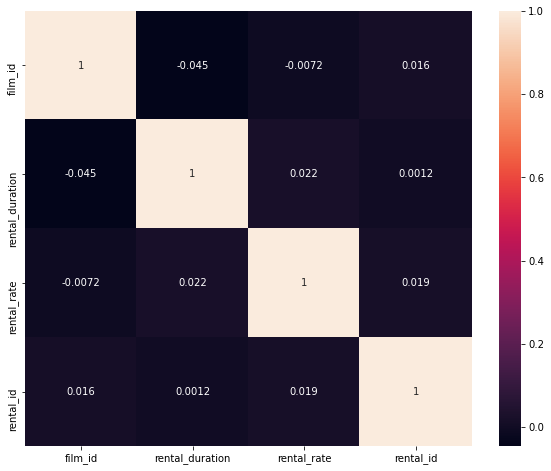

In [39]:
## I got lost as of here as my variables have really little correlation and if I check for the distribution I dont really understand


corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()



In [ ]:
## Apologies for not finishing it but didn't know how to proceed.